<a href="https://colab.research.google.com/github/aaapetrova/DSP/blob/main/Petrova_lb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download wave file

# Лабораторная работа по  ""

Цель работы - 


In [1]:
!wget https://github.com/R6500/Python-bits/raw/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
path_to_wave = "/content/audio_voice.wav"

--2021-10-19 10:39:49--  https://github.com/R6500/Python-bits/raw/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Sounds/Bicycle%20bell%203.wav [following]
--2021-10-19 10:39:49--  https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1869076 (1.8M) [audio/wav]
Saving to: ‘Bicycle bell 3.wav’

Bicycle bell 3.wav  100%[===================>]   1.78M  --.-KB/s    in 0.02s   

2021-10-19 10:39:50 (72.6 MB/s) - ‘Bicycle

# Needed imports

In [2]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt

Sample rate: 48000 Hz
Total time: 3.96s


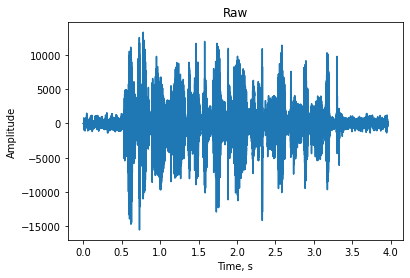

In [37]:
frame_rate, sound_data = wavfile.read(path_to_wave)
time                   = np.arange(0,len(sound_data))/frame_rate

sound_data = sound_data.T[0]
# Show information about the object
print('Sample rate:',frame_rate,'Hz')
print(f'Total time: {len(sound_data)/frame_rate}s')


plt.plot(time, sound_data)
plt.title("Raw")
plt.xlabel("Time, s")
plt.ylabel("Amplitude")

plt.show()

# Launch raw version of sound

In [50]:
Audio(sound_data,rate=frame_rate)

## Test. Example: How to create a some sound

In [ ]:
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
Audio(data,rate=framerate)

# Фильтр нижних частот (ФНЧ)



In [7]:
Fd = frame_rate # частота дискретизации
Fs = frame_rate / 100 # частота среза / TODO: не знаю как определить
m = 1 # порядок фильтра - описывает скорость затухания сигнала после частоты среза
wn = 2 * Fs/ Fd # 

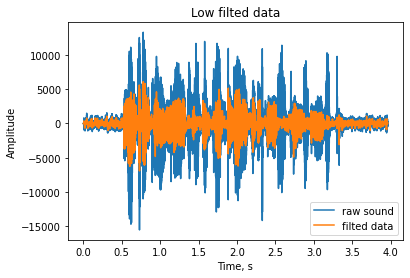

In [40]:
# не знаю можно ли так делать
from scipy import signal

def filter_low_pass(FD, FS, m, data):
    wn = 2 * FS/ FD
    b, a = signal.butter(m, wn, 'lowpass')
    return signal.filtfilt(b, a, data)

filtedData = filter_low_pass(Fd, Fs, m, sound_data)

fig, ax = plt.subplots()
plt.title("Low filted data")
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
ax.plot(time, sound_data, label = 'raw sound')
ax.plot(time, filtedData, label = 'filted data')
ax.legend()
plt.show()

Audio(filtedData,rate=frame_rate)

# ЭХО

In [46]:
Nl = 8
DISTANCE = 300 # метров
time_to_wall = DISTANCE / 335 # СКОРОСТЬ ЗВУКА
D1 = frame_rate * time_to_wall
gamma = 0.4
D1

42985.07462686567

In [76]:
D = [int(D1 * 2 ** ((1 - i)/Nl)) for i in range(1, Nl +1)]
alpha = [np.exp(-i/5) for i in range(0, Nl)]
len(D), len(alpha)

(8, 8)

In [69]:
np.exp(-1)
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [82]:
echo_voice = np.zeros(len(sound_data) * (len(D) + 1) )
echo_voice[:len(sound_data)] = sound_data

echo_part = np.zeros(len(sound_data) * len(D))

for idx, val in enumerate(D):
  d = D[idx]
  a = alpha[idx]
  x = sound_data * a

  echo_part[idx * len(sound_data): (idx + 1) * len(sound_data)] = x[:]

echo_part = filter_low_pass(Fd, Fs, 1, echo_part)
echo_part = [i*gamma for i in echo_voice]
echo_voice[len(sound_data):] = echo_part
Audio(echo_voice,rate=frame_rate)
#from itertools import zip_longest

#delay_lines = [[0 for j in range(i)] + list(sound_data) for i in D]
#print(len(delay_lines[1]))
#print(len(delay_lines[0]))
#delay_lines = [[i*a for i in line] for a, line in zip(alpha, delay_lines)]

#sum_delay_lines = [sum(x) for x in zip_longest(*delay_lines, fillvalue=0)]
#filter_sum = filter_low_pass(Fd, Fs, 1, sum_delay_lines)
#gamma_lines = [i*gamma for i in filter_sum]

#target_signal = [sum(x) for x in zip_longest(gamma_lines, sound_data, fillvalue=0)] 

#time_echo = np.linspace(0, len(target_signal)/Fd, num=len(target_signal))
#fig, ax = plt.subplots()
#plt.title("Echo")
#plt.xlabel("Time, s")
#plt.ylabel("Amplitude")
#ax.plot(time_echo, target_signal, label = 'echo data')
#ax.plot(time, sound_data, label = 'raw sound')
#ax.legend()
#plt.show()

#Audio(target_signal,rate=frame_rate)

ValueError: ignored

# Distortion

In [17]:
TH = 10000 # ПОРОГ
MAX = 30000 # МАКСМАЛЬНОЕ ЗНАЧЕНИЕ


# АККУРАТНО - НЕ ВКЛЮЧАТЬ В НАУШНИКАХ

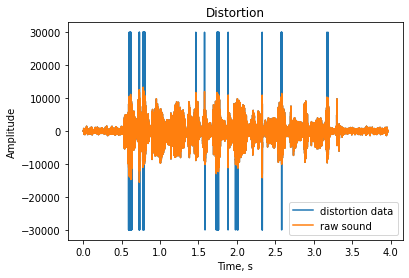

In [36]:
distortion_data = []
for i in sound_data:
  if abs(i) <= TH:
    value = i
  else:
    value = MAX * (-1 if i < 0 else 1)
  distortion_data.append(value)

fig, ax = plt.subplots()
plt.title("Distortion")
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
ax.plot(time, distortion_data, label = 'distortion data')
ax.plot(time, sound_data, label = 'raw sound')
ax.legend()
plt.show()

Audio(np.array(distortion_data, dtype=np.int16),rate=frame_rate)

# Вывод

по ходу выполнения лабораторной работы были изучены возможности библиотек Python для решения задач цифровой обработки сигналов.